![FAO](FAO_Logo.png)

# Missions principales
Affiner l'état de sous-nutrition par pays :
- les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017;
- les pays ayant bénéficié du plus d'aide depuis 2013;
- les pays ayant le plus/le moins de disponibilité/habitant.


**Les fichiers csv fournis sont**
- aide_alimentaire
- dispo_alimentaire
- population
- sous_nutrition

# I. Préparation des données

## Importation des données

Import des librairies

In [1]:
import pandas as pd
import numpy as np

# On indique que l'on veut voir apparaître les graphiques dans le notebook, sinon on ne verrait rien
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import seaborn as sns

#import du module de fonctions communes aux 2 notebooks
import commonFunctions as cf

Import des 4 fichiers fournis en créant un data frame par fichier

In [2]:
chemin_fichiers = './csv/'

In [3]:
df_foodaid = pd.read_csv(chemin_fichiers+'aide_alimentaire.csv')

In [4]:
df_avail = pd.read_csv(chemin_fichiers+'dispo_alimentaire.csv')

In [5]:
df_pop=pd.read_csv(chemin_fichiers+'population.csv')

In [6]:
df_undernut=pd.read_csv(chemin_fichiers+'sous_nutrition.csv')

## Déclarations de variables

In [7]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

kcal_need=2326.8

## Vérification des fichiers 

### Fichier aide_alimentaire

In [8]:
df_foodaid

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


Affichage du typage des colonnes

In [9]:
df_foodaid.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

Y a-t-il des valeurs nulles ?

In [10]:
df_foodaid.isnull().any()

Pays bénéficiaire    False
Année                False
Produit              False
Valeur               False
dtype: bool

### Fichier dispo_alimentaire

In [11]:
df_avail

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Affichage du typage des colonnes

In [12]:
df_avail.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

Y a-t-il des valeurs nulles?

In [13]:
df_avail.isnull().any()

Zone                                                             False
Produit                                                          False
Origine                                                          False
Aliments pour animaux                                             True
Autres Utilisations                                               True
Disponibilité alimentaire (Kcal/personne/jour)                    True
Disponibilité alimentaire en quantité (kg/personne/an)            True
Disponibilité de matière grasse en quantité (g/personne/jour)     True
Disponibilité de protéines en quantité (g/personne/jour)          True
Disponibilité intérieure                                          True
Exportations - Quantité                                           True
Importations - Quantité                                           True
Nourriture                                                        True
Pertes                                                            True
Produc

### Fichier population

In [14]:
df_pop

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


Affichage du typage des colonnes

In [15]:
df_pop.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

Y a-t-il des valeurs nulles?

In [16]:
df_pop.isnull().any()

Zone      False
Année     False
Valeur    False
dtype: bool

Vérifier si la clé zone/année est unique

In [17]:
zone_an=df_pop.groupby(["Zone","Année"]).size().reset_index(name="Count")
zone_an[(zone_an['Count'] >1)].value_counts()

Series([], dtype: int64)

### Fichier sous_nutrition

In [18]:
df_undernut

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


Affichage du typage des colonnes

In [19]:
df_undernut.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

Y a-t-il des valeurs nulles?

In [20]:
df_undernut.isnull().any()

Zone      False
Année     False
Valeur     True
dtype: bool

### Conclusion
2 fichiers ont des valeurs nulles
- sous_nutrition
- dispo_alimentaire<br>

Je ne vais pas modifier ces valeurs pour le moment.

2 attributs peuvent poser problème dans le fichier sous_nutrition :
- "Valeur" qui devrait être un numérique.
- "Année" qui est un intervalle de type Objet.

Le fichier population contient bien une seule combinaison de Pays+Année

# II. Etude de la qualité des données, duplicatas, imputation, suppressions d'indicateurs

## Transformation de données

La colonne *Valeur* est un objet, ce qui ne nous permet pas de l'exploiter arithmétiquement.<br>
Je la transforme en float dans le dataframe sous_nutrition.

In [21]:
# On attribue 0 pour toutes les occurences valant "<0.1" qui bloque la conversion
df_undernut.loc[df_undernut['Valeur'] == '<0.1', 'Valeur'] = 0

# Et maintenant on peut convertir
df_undernut.Valeur=pd.to_numeric(df_undernut["Valeur"])

Pour faciliter la lecture et les éventuelles jointures à venir, je convertis la colonne *Année* dans le dataframe sous_nutrition en un int contenant une année et non plus un intervalle.<br>
Je récupère les valeurs uniques de cette colonne pour avoir les informations des données à remplacer.<br>
Enfin, je vérifie que la conversion est ok en regardant le type de données après application de la fonction

In [22]:
df_undernut.Année.unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [24]:
#Appel de la fonction de transformation de l'année
df_undernut.Année=df_undernut.Année.apply(cf.transform_year).astype(int)
df_undernut.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

## Conversion de données

Dans le dataframe population, on convertit le nombre d'habitants en milliers (colonne *Valeur*), puis on passe la donnée en entier numérique

In [25]:
df_pop['Valeur']*=1000
df_pop['Valeur']=df_pop['Valeur'].astype('int')
df_pop

,Zone,Année,Valeur
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


Dans le dataframe sous_nutrition, on convertit le nombre d'habitants en millions (colonne *Valeur*), puis on passe la donnée en entier numérique

In [26]:
df_undernut['Valeur']*=1000000
#df_undernut['Valeur']=df_undernut['Valeur'].astype('int') Pas de conversion à cause des Nan
df_undernut

,Zone,Année,Valeur
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


Comme les données de dispo_alimentaire sont exprimées, pour ce qui est des disponibilités et autres, en millier de tonnes, on convertit la colonne *Valeur*, exprimée en tonne, en milliers de tonnes.

In [27]:
df_foodaid.Valeur*=1000
df_foodaid

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


# III. Analyse statistique, création de nouveaux indicateurs, filtrage, jointure de fichiers, visualisations.

## Analyse par pays de la proportion de personnes sous-alimentées en 2017

Etapes :
- Fusionner les tableaux sous-nutrition et population sur la clé "Zone/Année"
    - On s'aperçoit, en faisaint une jointure externe, que certains pays sont présents dans un tableau et pas dans l'autre.
    - On va vérifier si on retrouve bien tous les pays du tableau le plus court dans le tableau le plus long : 
        - Si oui, on continue. 
        - Si non, il faufra identifier les écarts
- Créer une nouvelle colonne indiquant la proportion
- Tri des données sur 2017

In [30]:
# Création d'une liste des pays uniques (issue du fichier population) et de son dataframe
pop_unique_country_list=df_pop.Zone.unique()
df_pop_unique_country=pd.DataFrame(pop_unique_country_list, columns=["Zone"])
print(len(df_pop_unique_country))

236


In [31]:
# Création d'une liste des pays uniques (issue du fichier sous-nutrition) et de son dataframe
undernourished_unique_country_list=df_undernut.Zone.unique()
df_undernourished_unique_country=pd.DataFrame(undernourished_unique_country_list, columns=["Zone"])
print(len(undernourished_unique_country_list))

203


Si tous les pays de la liste du fichier sous-nutrition sont présents, alors il n'est pas nécessaire de comparer la liste des pays du tableau population.<br>
Le cas contraire, on lance également la fonction en inversant la comparaison. On identifiera alors les écarts et apportera les évenutelles corrections.

In [32]:
df_missing_countries_from_undernourished=cf.compare_content_dataframe(df_undernourished_unique_country,pop_unique_country_list)

if len(df_missing_countries_from_undernourished[df_missing_countries_from_undernourished["Present dans la liste"]=="Non"])!=0:
    df_missing_countries_from_pop = cf.compare_content_dataframe(df_pop_unique_country,undernourished_unique_country_list)
    print(df_missing_countries_from_pop[df_missing_countries_from_pop["Present dans la liste"]=="Non"])
    print(f"""Les pays non trouvés dans le fichier population sont les suivants :
          {df_missing_countries_from_undernourished[df_missing_countries_from_undernourished["Present dans la liste"]=="Non"]}""")
    potential_countries = cf.search_for_potential_matching(df_missing_countries_from_undernourished[df_missing_countries_from_undernourished["Present dans la liste"]=="Non"]["Zone"]\
                    , df_missing_countries_from_pop[df_missing_countries_from_pop["Present dans la liste"]=="Non"]["Zone"],\
                    pop_unique_country_list,undernourished_unique_country_list)
    print (f"Voici la liste des pays qui pourraient correspondre au pays manquants :{potential_countries}.")
else:
    print("Tous les pays présents dans sous_alimentation sont présents dans le fichier population")  


Tous les pays présents dans sous_alimentation sont présents dans le fichier population


On merge les fichiers fichiers sur la base du couple Zone/Année

In [33]:
df_undernourished_pop=df_undernut.merge(df_pop, left_on=["Zone","Année"], right_on=["Zone","Année"])
df_undernourished_pop.rename(columns={"Valeur_x" : "Habitants en sous-nutrition","Valeur_y":"Population totale", "Zone":"Pays"}, inplace=True)
df_undernourished_pop

,Pays,Année,Habitants en sous-nutrition,Population totale
0,Afghanistan,2013,8600000.0,32269589
1,Afghanistan,2014,8800000.0,33370794
2,Afghanistan,2015,8900000.0,34413603
3,Afghanistan,2016,9700000.0,35383032
4,Afghanistan,2017,10500000.0,36296113
...,...,...,...,...
1213,Zimbabwe,2014,NaN,13586707
1214,Zimbabwe,2015,NaN,13814629
1215,Zimbabwe,2016,NaN,14030331
1216,Zimbabwe,2017,NaN,14236595


On identifie les valeurs inutiles pour notre analyse:<br>
NaN signifie qu'on n'a pas l'information, et 0 que le pays n'est a priori pas en sous-nutrition.<br>

In [34]:
zero_value=df_undernourished_pop[df_undernourished_pop["Habitants en sous-nutrition"]==0]
nan_value=df_undernourished_pop[df_undernourished_pop["Habitants en sous-nutrition"].isna()]
print(f"La colonne 'Habitants en sous-nutrition' contient {zero_value.shape[0]} valeurs à 0, et {nan_value.shape[0]} valeurs Nan.")


La colonne 'Habitants en sous-nutrition' contient 120 valeurs à 0, et 594 valeurs Nan.


Nous n'avons donc pas d'utilité à conserver ces pays pour notre analyse sur la sous-nutrition.<br>
On va supprimer les Nan puis supprimer toutes les lignes ayant 0 en ayant d'abord pris soin de les enregistrer dans un tableau.

Sauvegarde des données inexploitables

In [35]:
null_df_undernut_pop=df_undernourished_pop.copy()
null_df_undernut_pop=pd.concat([zero_value,nan_value])

Suppression des données inexploitables

In [36]:
final_df_undernut_pop=df_undernourished_pop.copy()
final_df_undernut_pop.dropna(axis=0, subset=["Habitants en sous-nutrition"], inplace=True) #subset permet de ne cibler qu'une liste de colonne(s) sur lesquelles on regarde si les valeurs sont nulles
final_df_undernut_pop.drop(final_df_undernut_pop[final_df_undernut_pop["Habitants en sous-nutrition"]==0].index, inplace=True)
print(f'''Au départ, nous avions {len(df_undernourished_pop)} lignes.
Nous avons identifié {zero_value.shape[0]+nan_value.shape[0]} valeurs à supprimer.
Il nous reste bien {len(final_df_undernut_pop)} lignes.''')

Au départ, nous avions 1218 lignes.
Nous avons identifié 714 valeurs à supprimer.
Il nous reste bien 504 lignes.


In [37]:
percent_undernourished=final_df_undernut_pop["Habitants en sous-nutrition"]/final_df_undernut_pop["Population totale"]
final_df_undernut_pop["Pourcentage sous-nutrition"]=percent_undernourished*100
final_df_undernut_pop.head(10)

,Pays,Année,Habitants en sous-nutrition,Population totale,Pourcentage sous-nutrition
0,Afghanistan,2013,8600000.0,32269589,26.650479
1,Afghanistan,2014,8800000.0,33370794,26.370364
2,Afghanistan,2015,8900000.0,34413603,25.861866
3,Afghanistan,2016,9700000.0,35383032,27.414270
4,Afghanistan,2017,10500000.0,36296113,28.928718
5,Afghanistan,2018,11100000.0,37171921,29.861249
6,Afrique du Sud,2013,2200000.0,53687121,4.097817
7,Afrique du Sud,2014,2500000.0,54544186,4.583440
8,Afrique du Sud,2015,2800000.0,55386367,5.055396
9,Afrique du Sud,2016,3000000.0,56207645,5.337352


In [38]:
final_df_undernut_pop_2017=final_df_undernut_pop[final_df_undernut_pop.Année==2017]
df_pop1=df_pop[(df_pop["Année"]==2017)][["Zone","Valeur"]].copy()
print("Liste des 15 pays les plus sous alimentés en proportion de leur nombre d'habitants")
final_df_undernut_pop_2017.sort_values(by="Pourcentage sous-nutrition", ascending=False).iloc[:15]

Liste des 15 pays les plus sous alimentés en proportion de leur nombre d'habitants


,Pays,Année,Habitants en sous-nutrition,Population totale,Pourcentage sous-nutrition
472,Haïti,2017,5300000.0,10982366,48.259182
946,République populaire démocratique de Corée,2017,12000000.0,25429825,47.188685
652,Madagascar,2017,10500000.0,25570512,41.062924
622,Libéria,2017,1800000.0,4702226,38.279742
604,Lesotho,2017,800000.0,2091534,38.249438
1102,Tchad,2017,5700000.0,15016753,37.957606
970,Rwanda,2017,4200000.0,11980961,35.055619
730,Mozambique,2017,9400000.0,28649018,32.810898
1120,Timor-Leste,2017,400000.0,1243258,32.173531
4,Afghanistan,2017,10500000.0,36296113,28.928718


### Conclusion
7,1% de la population est en sous-nutrition  en 2017 (voir part1), ce qui représente 35,6% des pays.<br>
54 pays se trouvent sous cette barre de sous-nutrition sur un total 236, soit 22,88%.<br>


In [39]:
nb_counties_under_7percent=len(final_df_undernut_pop_2017[final_df_undernut_pop_2017["Pourcentage sous-nutrition"]>7.1])
total_countries_undernourished_2017=len(final_df_undernut_pop_2017)
total_countries_2017=len(df_pop[df_pop["Année"]==2017])
percent_countries_undernourished_2017=(total_countries_undernourished_2017/total_countries_2017)*100
percent_countries_really_undernourished_2017=(nb_counties_under_7percent/total_countries_2017)*100
print(f"En 2017, il y a {nb_counties_under_7percent} pays sur les {len(final_df_undernut_pop_2017)} figurant dans la liste des pays en sous-nutrition qui sont sous la barre de la moyenne mondiale (7,1%)")

En 2017, il y a 54 pays sur les 84 figurant dans la liste des pays en sous-nutrition qui sont sous la barre de la moyenne mondiale (7,1%)


In [40]:
nb_counties_under_7percent

54

In [41]:
total_countries_undernourished_2017

84

In [42]:
total_countries_2017

236

In [43]:
round(percent_countries_undernourished_2017,2)

35.59

In [44]:
round(percent_countries_really_undernourished_2017,2)

22.88

## Analyse de l'aide alimentaire entre 2013 et 2017

Agrégation des valeurs par Pays et tri par *Valeur*.<br>
On garde les 10 pays les plus aidés.

In [45]:
df_total_food_aid_per_country = df_foodaid.groupby(["Pays bénéficiaire"], as_index=False)["Valeur"].sum()
df_total_food_aid_per_country_top10=df_total_food_aid_per_country.sort_values("Valeur", ascending=False).head(10)
df_total_food_aid_per_country_top10

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


Je convertis mon tableau en tableau croisé dynamique avec pd.crosstab, pour faire un schéma

<Figure size 11200x4800 with 0 Axes>

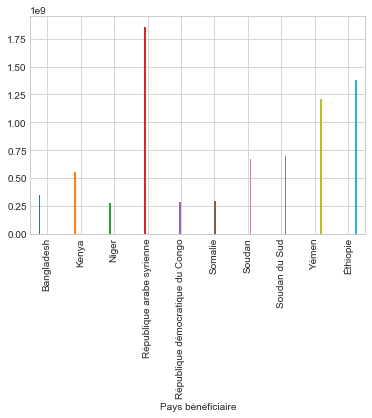

In [46]:
pivot_table_food_aid=pd.crosstab(index=df_total_food_aid_per_country_top10["Pays bénéficiaire"],columns=df_total_food_aid_per_country_top10["Pays bénéficiaire"],values=df_total_food_aid_per_country_top10.Valeur, aggfunc=sum, margins=False)
fig(figsize=(140, 60), dpi=80)
plt.style.use('seaborn-whitegrid')
a=pivot_table_food_aid.plot.bar(stacked=False)
axes = plt.gca()
axes.yaxis.set_tick_params(width = 50)
leg = plt.legend()
a.get_legend().remove()


### Conclusion
La République arabe syrienne fait par du top 10 des pays ayant bénéficié le plus d'aide alimentaire sur les 4 années analysées.<br>
Mais elle ne figure pas, à l'instar d'autres pays de ce top, dans les données de sous-nutrition. <br>
Pour donner plus de sens aux données, il convient de les confronter avec celles des pays en sous-nutrition.

## Relation entre aide alimentaire et sous-nutrition

Etapes réalisées :
1. Calcul de la moyenne pour chaque pays du fichier sous-nutrition
2. Calcul de la moyenne de population pour chaque pays du fichier population
3. Merge des données
4. Calcul du ratio de pers. en sous-nutrition (valeur sous-nutrition / population)
5. Création du top 10
6. Comparaison avec le top 10 de l'aide alimentaire


Je calcule la moyenne de sous-nutrition sur les 6 années disponibles.<br>
Je me débarasse des valeurs vides et nulles.

In [47]:
undernut_mean_per_coutry_df=df_undernut.groupby(["Zone"], as_index=False)["Valeur"].mean()
undernut_mean_per_coutry_df.dropna(how="any", inplace=True)
undernut_mean_per_coutry_df.drop(undernut_mean_per_coutry_df[undernut_mean_per_coutry_df.Valeur==0].index, inplace=True)
undernut_mean_per_coutry_df_top10=undernut_mean_per_coutry_df.sort_values("Valeur", ascending=False)
undernut_mean_per_coutry_df_top10.shape

(87, 2)

Calcul de la moyenne de la population pour chaque pays.

In [48]:
pop_mean_per_country_df=df_pop.groupby(["Zone"], as_index=False)["Valeur"].mean()
pop_mean_per_country_df.head()

,Zone,Valeur
0,Afghanistan,3.481751e+07
1,Afrique du Sud,5.577127e+07
2,Albanie,2.890659e+06
3,Algérie,4.016014e+07
4,Allemagne,8.206479e+07


Merge des données

In [49]:
df_total_food_aid_per_population = undernut_mean_per_coutry_df_top10.merge(pop_mean_per_country_df,right_on="Zone", left_on="Zone")
df_total_food_aid_per_population.head()

,Zone,Valeur_x,Valeur_y
0,Inde,1.942333e+08,1.317072e+09
1,Pakistan,2.675000e+07,2.016264e+08
2,Indonésie,2.361667e+07,2.598658e+08
3,Éthiopie,2.268333e+07,1.022572e+08
4,Bangladesh,2.201667e+07,1.570957e+08


Renommage des colonnes à la suite du merge.<br>
Création de la colonne pour calcul du pourcentage d'habitants en sous-nutrition.<br>
Classement sur le pourcentage et sélection du top 10 des pays les plus sous-alimentés.

In [50]:
df_total_food_aid_per_population.rename(columns={"Valeur_x" : "Habitants en sous-nutrition","Valeur_y":"Population"}, inplace=True)
df_total_food_aid_per_population["Pourcentage sous-nutrition"] = (df_total_food_aid_per_population["Habitants en sous-nutrition"]/df_total_food_aid_per_population["Population"])*100
df_total_food_aid_per_population_top10=df_total_food_aid_per_population.sort_values("Pourcentage sous-nutrition", ascending=False).head(10)
df_total_food_aid_per_population_top10

,Zone,Habitants en sous-nutrition,Population,Pourcentage sous-nutrition
21,Haïti,5.200000e+06,1.076512e+07,48.304138
8,République populaire démocratique de Corée,1.135000e+07,2.524304e+07,44.962896
10,Madagascar,9.633333e+06,2.458540e+07,39.183140
39,Libéria,1.700000e+06,4.531342e+06,37.516476
19,Tchad,5.333333e+06,1.434185e+07,37.187199
69,Timor-Leste,4.000000e+05,1.209074e+06,33.083156
26,Rwanda,3.783333e+06,1.153600e+07,32.795887
60,Lesotho,6.500000e+05,2.067648e+06,31.436686
13,Mozambique,8.250000e+06,2.747732e+07,30.024764
33,Sierra Leone,2.050000e+06,7.253408e+06,28.262575


Préparation de la comparaison en créant une liste du top 10 des pays les plus aidés et du dataframe associé

In [51]:
list_foodaid_per_country=df_total_food_aid_per_country_top10["Pays bénéficiaire"].unique()
foodaid_per_country_df=pd.DataFrame(list_foodaid_per_country,columns=["Pays bénéficiaire"])

Appel de la fonction de comparaison<br>
Comparaison entre le top 10 des données de sous-nutrition et d'aide_alimentaire

In [53]:
delta_aid_undernut=cf.compare_content_dataframe(df_total_food_aid_per_population_top10[["Zone"]],list_foodaid_per_country)
if len(delta_aid_undernut[delta_aid_undernut["Present dans la liste"]=="Oui"])>0:
    print(f'Seul {(delta_aid_undernut[delta_aid_undernut["Present dans la liste"]=="Oui"])} apparaît dans la liste des pays les plus aidés')
elif len(delta_aid_undernut[delta_aid_undernut["Present dans la liste"]=="Oui"])==0:
    print(f'Aucun pays en sous-nutrition n\'apparaît dans la liste des pays les plus aidés.')
else:
    print(f'''Les pays en sous-nutrition appartenant à la liste suivante font partie des pays les plus aidés:
    {(delta_aid_undernut[delta_aid_undernut["Present dans la liste"]=="Oui"].values[:,0])}
    ''')

Aucun pays en sous-nutrition n'apparaît dans la liste des pays les plus aidés.


### Observations
A première vue, il n'y a pas de corrélation entre le volume d'aide apporté aux pays et les pays ayant la plus grande proportion d'habitants en sous-nutrition.<br>
En effet aucun pays des 10 pays ayant le plus fort ratio de population sous-alimentée n'est dans le top 10 des pays bénéficiant le plus d'aide.<br>

A noter que La république arabe syrienne, qui bénéficie du plus d'aide, ne possède pas de données sur son état de sous-nutrition.<br>
Nous ne pouvons donc pas vraiment mettre en parallèle le besoin et l'aide.<br>
C'est ce que nous allons faire maintenant.

### Analyse sur les pays en sous-nutrition uniquement

Je récupère la liste des pays étant été écartés car ayant des valeurs non exploitables (0 et Nan) dans le fichier sous-nutrition

In [54]:
list_null_df_undernut=null_df_undernut_pop["Pays"].unique()

Je copie df_aid_food_per_year qui contient toutes les données sur l'aide alimentaire.<br>
Le but de la boucle étant de supprimer de cette liste toutes les lignes dont le pays est dans le fichier des données supprimées de sous-nutrition (list_null_df_undernut) :<br>
- On compare chaque pays du dataframe df_aid_food_per_year à la liste des données supprimées.<br>
    - Si on trouve une correspondance, on supprime la ligne.


In [55]:
df_aid_food_per_country_with_undernut_values=df_total_food_aid_per_country.copy()
for i in range(len(df_total_food_aid_per_country)):
        for element in df_total_food_aid_per_country.values[i]:
            if element in list_null_df_undernut:
                index_to_del=df_aid_food_per_country_with_undernut_values[df_aid_food_per_country_with_undernut_values["Pays bénéficiaire"]==element].index
                df_aid_food_per_country_with_undernut_values.drop(index_to_del,axis=0, inplace=True)
df_aid_food_per_country_with_undernut_values_top10=df_aid_food_per_country_with_undernut_values.sort_values("Valeur", ascending=False).head(10)
df_aid_food_per_country_with_undernut_values_top10

,Pays bénéficiaire,Valeur
75,Éthiopie,1381294000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
66,Tchad,267966000
46,Pakistan,231072000
55,République populaire démocratique de Corée,187412000
0,Afghanistan,185452000
56,République-Unie de Tanzanie,172022000
48,Philippines,171722000


Appel de la fonction de comparaison

In [57]:
delta_aid_undernut_without_null=cf.compare_content_dataframe(df_total_food_aid_per_population_top10[["Zone"]],df_aid_food_per_country_with_undernut_values_top10["Pays bénéficiaire"].to_list())
len_df=len(delta_aid_undernut_without_null[delta_aid_undernut_without_null["Present dans la liste"]=="Oui"])
if len_df==1:
    print(f'Seul {(delta_aid_undernut_without_null[delta_aid_undernut_without_null["Present dans la liste"]=="Oui"])["Zone"].values[0]} apparaît dans la liste des 10 pays les plus aidés')
elif len_df==0:
    print(f'Aucun pays en sous-nutrition n\'apparaît dans la liste des pays les plus aidés.')
else:
    print(f'''Les pays en sous-nutrition appartenant à la liste suivante font partie des 10 pays les plus aidés:
    {','.join(list(delta_aid_undernut_without_null[delta_aid_undernut_without_null["Present dans la liste"]=="Oui"]["Zone"]))}''')

Les pays en sous-nutrition appartenant à la liste suivante font partie des 10 pays les plus aidés:
    République populaire démocratique de Corée,Tchad


### Conclusion
En retirant du top 10 les données des pays ne possédant pas d'informations sur leur état de sous-nutrition, l'observation réalisée se confirme. Seuls 2 pays figurant parmi les plus en difficulté bénéficient le plus d'aide.

##  Analyse des pays ayant le plus/le moins de disponibilité/habitant en 2017

Remarques:<br>
Comme nous n'avons les données de disponibilité que sur l'année 2017, nous travaillerons uniquement sur cette année.<br>
Nous ne pourrons pas mettre en parallèle la disponibilité et l'aide car nous n'avons pas l'information sur l'aide alimentaire en 2017.<br>

Etapes réalisées : 
1. Aggrégation de la disponibilité en kcal par Pays sur le tableau dispo_alimantaire
2. Merge de l'aggrégation avec le tableau de population pour récupéréer pouvoir pondérer les données
3. Calculs des différentes informations nécessaires à l'analyse

Rappel : <br>
Le besoin moyen en kcal a été calculé dans la partie 1. On l'a déclaré en tant que variable en début de programme.

Vu dans la partie 1, il faut corriger 2 noms de pays pour pouvoir les rapprocher

In [58]:
df_avail=df_avail.replace("Tchéquie (la)", "Tchéquie")
df_pop=df_pop.replace("Royaume-Uni de Grande-Bretagne et d'Irlande du Nord","Royaume-Uni")

In [59]:
df_avail_per_country=df_avail.groupby(["Zone"], as_index=False)["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
df_avail_per_country.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


Merge avec le fichier population pour pouvoir calculer les informations par habitant

In [60]:
df_avail_per_country_with_pop=df_avail_per_country.merge(df_pop[df_pop["Année"]==2017])
df_avail_per_country_with_pop.rename(columns={"Valeur":"Population"}, inplace=True)
df_avail_per_country_with_pop.drop(columns="Année", inplace=True) 

On calcule différentes informations : <br>
    - On ramène la production de kcal/pers/jour à la population (colonne *Dispo alimentaire en kcal/population/jour*<br>
    - On calcule le besoin calorique de la population de chaque pays (colonne *Besoin en kcal/pop/jour*)<br>
    - On calcule le ratio, pour chaque pays et sa population, entre le besoin et la production (colonne *Ratio production kcal/habitant/jour*)
    

In [61]:
df_avail_per_country_with_pop["Dispo alimentaire en kcal/population/jour"]=(df_avail_per_country_with_pop["Disponibilité alimentaire (Kcal/personne/jour)"]*df_avail_per_country_with_pop["Population"])
df_avail_per_country_with_pop["Besoin en kcal/pop/jour"]=df_avail_per_country_with_pop["Dispo alimentaire en kcal/population/jour"]/kcal_need 
df_avail_per_country_with_pop["Ratio production kcal/habitant/jour"]=round(df_avail_per_country_with_pop["Besoin en kcal/pop/jour"]/df_avail_per_country_with_pop["Population"],2)
df_avail_per_country_with_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Dispo alimentaire en kcal/population/jour,Besoin en kcal/pop/jour,Ratio production kcal/habitant/jour
0,Afghanistan,2087.0,36296113,7.574999e+10,3.255544e+07,0.90
1,Afrique du Sud,3020.0,57009756,1.721695e+11,7.399410e+07,1.30
2,Albanie,3188.0,2884169,9.194731e+09,3.951664e+06,1.37
3,Algérie,3293.0,41389189,1.362946e+11,5.857598e+07,1.42
4,Allemagne,3503.0,82658409,2.895524e+11,1.244423e+08,1.51


In [62]:
df_avail_per_country_with_pop.drop(columns=["Dispo alimentaire en kcal/population/jour","Besoin en kcal/pop/jour"], inplace=True)
df_avail_per_country_with_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Ratio production kcal/habitant/jour
0,Afghanistan,2087.0,36296113,0.90
1,Afrique du Sud,3020.0,57009756,1.30
2,Albanie,3188.0,2884169,1.37
3,Algérie,3293.0,41389189,1.42
4,Allemagne,3503.0,82658409,1.51


Je créé 2 dataframe, un avec les 10 pays ayant le plus de disponibilité/habitant, et l'autre avec les 10 pays ayant le moins de disponibilité/habitant, puis je les rassemble en un seul.<br>
Pour plus de clareté dans le tableau final, je rajouter une colonne indiquant si c'est top 10 ou bottom10

In [63]:
df_avail_per_country_bottom10=df_avail_per_country_with_pop.sort_values("Ratio production kcal/habitant/jour", ascending=False).tail(10)
df_avail_per_country_bottom10["Statut"]="Bottom 10"
df_avail_per_country_bottom10

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Ratio production kcal/habitant/jour,Statut
151,Tchad,2109.0,15016753,0.91,Bottom 10
114,Ouganda,2126.0,41166588,0.91,Bottom 10
167,Zimbabwe,2113.0,14236595,0.91,Bottom 10
172,Éthiopie,2129.0,106399924,0.91,Bottom 10
133,République populaire démocratique de Corée,2093.0,25429825,0.90,Bottom 10
65,Haïti,2089.0,10982366,0.90,Bottom 10
0,Afghanistan,2087.0,36296113,0.90,Bottom 10
91,Madagascar,2056.0,25570512,0.88,Bottom 10
166,Zambie,1924.0,16853599,0.83,Bottom 10
128,République centrafricaine,1879.0,4596023,0.81,Bottom 10


In [64]:
df_avail_per_country_top10=df_avail_per_country_with_pop.sort_values("Ratio production kcal/habitant/jour", ascending=False).head(10)
df_avail_per_country_top10["Statut"]="Top 10"
df_avail_per_country_top10

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Ratio production kcal/habitant/jour,Statut
11,Autriche,3770.0,8819901,1.62,Top 10
16,Belgique,3737.0,11419748,1.61,Top 10
159,Turquie,3708.0,81116450,1.59,Top 10
171,États-Unis d'Amérique,3682.0,325084756,1.58,Top 10
72,Irlande,3602.0,4753279,1.55,Top 10
74,Israël,3610.0,8243848,1.55,Top 10
75,Italie,3578.0,60673701,1.54,Top 10
89,Luxembourg,3540.0,591910,1.52,Top 10
4,Allemagne,3503.0,82658409,1.51,Top 10
168,Égypte,3518.0,96442591,1.51,Top 10


Je créé mon tableau avec les valeurs extrêmes : top 10 et bottom 10

In [65]:
df_avail_per_country_ends=pd.concat([df_avail_per_country_top10, df_avail_per_country_bottom10])
df_avail_per_country_ends

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Ratio production kcal/habitant/jour,Statut
11,Autriche,3770.0,8819901,1.62,Top 10
16,Belgique,3737.0,11419748,1.61,Top 10
159,Turquie,3708.0,81116450,1.59,Top 10
171,États-Unis d'Amérique,3682.0,325084756,1.58,Top 10
72,Irlande,3602.0,4753279,1.55,Top 10
74,Israël,3610.0,8243848,1.55,Top 10
75,Italie,3578.0,60673701,1.54,Top 10
89,Luxembourg,3540.0,591910,1.52,Top 10
4,Allemagne,3503.0,82658409,1.51,Top 10
168,Égypte,3518.0,96442591,1.51,Top 10


In [66]:
total_countries=len(df_avail_per_country_with_pop)
count_number_countries_beyond_1=df_avail_per_country_with_pop[df_avail_per_country_with_pop["Ratio production kcal/habitant/jour"]>=1]
count_number_countries_below_1=df_avail_per_country_with_pop[df_avail_per_country_with_pop["Ratio production kcal/habitant/jour"]<1]

print(f"Il y a {total_countries} pays en 2017. {len(count_number_countries_beyond_1)} produisent plus que nécessaire pour leur population,\
 et {len(count_number_countries_below_1)} ont un ratio inférieur à 1.")

Il y a 174 pays en 2017. 152 produisent plus que nécessaire pour leur population, et 22 ont un ratio inférieur à 1.


Je vérifie si je retrouve ces 22 pays dans ma liste des pays ayant bénéficié d'aide alimentaire

In [67]:
#liste de pays ayant déjà bénéficié de l'aide alimentaire, quelle que soit l'année, entre 2013 et 2016, qu'il soit considéré en insécurité alimentaire ou pas.
countries_receiving_food_aid_list=df_foodaid["Pays bénéficiaire"].unique()

In [68]:
# dataframe des pays avec un ratio <1
df_countries_ratio_less_than_one=count_number_countries_below_1[["Zone"]]
df_countries_ratio_less_than_one

,Zone
0,Afghanistan
19,Bolivie (État plurinational de)
39,Congo
62,Guinée-Bissau
65,Haïti
80,Kenya
87,Libéria
91,Madagascar
103,Mozambique
105,Namibie


In [70]:
comparison_result=cf.compare_content_dataframe(df_countries_ratio_less_than_one,countries_receiving_food_aid_list)

In [71]:
countries_with_no_aid=comparison_result[comparison_result["Present dans la liste"]=="Non"]

print(f"Voici le ou les pays n'ayant pas bénéficié d'aide même s'il(s) ne produise(nt) pas assez de kcal pour leur population  {','.join(countries_with_no_aid.Zone)}")

Voici le ou les pays n'ayant pas bénéficié d'aide même s'il(s) ne produise(nt) pas assez de kcal pour leur population  Namibie


In [72]:
sous_nut_namibie=int(df_undernut[(df_undernut["Zone"]=="Namibie") & (df_undernut.Année==2017)]["Valeur"].values[0])
pop_namibie=df_pop[(df_pop.Année==2017) & (df_pop.Zone=="Namibie")]["Valeur"].values[0]
pop_sous_nut_namibie_2017=sous_nut_namibie/pop_namibie
print(f"La population namibienne en sous nutrition s'élève à {sous_nut_namibie} habitants sur {pop_namibie} (soit {pop_sous_nut_namibie_2017:.2%})")

La population namibienne en sous nutrition s'élève à 300000 habitants sur 2402633 (soit 12.49%)


### Conclusion
Quasiment tous les pays ne produisant pas assez de kcal pour leurs habitants (données de 2017) ont bénéficié de l'aide alimentaire entre 2013 et 2016.<br>
Mais nous n'avons pas l'information si tous ces pays sont en sous-nutrition, même si on peut le suspecter au vu de ces résultats.